In [3]:
import matplotlib.pylab as plt
from netCDF4 import Dataset, num2date
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline

In [4]:
f = Dataset('envisat_SIT_fb_snow-AMSR_sh_2002_2011_ease2_w50000.nc')

In [5]:
SIT = f.variables['SIT'][:]
time = f.variables['time']
lon = f.variables['longitude'][:]
lat = f.variables['latitude'][:]

#lon, lat = np.meshgrid(lon, lat)

In [6]:
dates = num2date(time[:], time.units)

In [7]:
dates[:5]

array([datetime.datetime(2002, 10, 15, 0, 0),
       datetime.datetime(2003, 5, 15, 0, 0),
       datetime.datetime(2003, 6, 15, 0, 0),
       datetime.datetime(2003, 7, 15, 0, 0),
       datetime.datetime(2003, 8, 15, 0, 0)], dtype=object)

In [8]:
dates_pd = pd.to_datetime(dates)
dates_pd[0]

Timestamp('2002-10-15 00:00:00')

In [9]:
periods = dates_pd.to_period(freq='M')
periods[1]

Period('2003-05', 'M')

In [10]:
def plt_map(data):
    m = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l')
    x, y = m(lon, lat)
    fig = plt.figure(figsize=(15,7))
    m.fillcontinents(color='white',lake_color='gray')
    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='skyblue')
    m.contourf(x,y,data,40,cmap=plt.cm.get_cmap('inferno'));
    plt.title("Seasonal Variations in SIT for {}".format(dates_pd[ii]))
    plt.colorbar()

In [11]:
#for ii in range(len(SIT)):
    plt_map(SIT[ii])
    plt.savefig('Image_{}'.format(dates_pd[ii]))

IndentationError: unexpected indent (<ipython-input-11-6f50d0196f64>, line 2)

In [9]:
import imageio
import os

path = '/home/eebc177student/Developer/Repos/eeb-c177-project/python-scripting' 
image_folder = os.fsencode(path)

filenames = []

for file in os.listdir(image_folder):
    filename = os.fsdecode(file)
    if filename.endswith( '.png') :
        filenames.append(filename)

filenames.sort() # this iteration technique has no built in order, so sort the frames

images = list(map(lambda filename: imageio.imread(filename), filenames))

imageio.mimsave(os.path.join('movie.gif'), images, duration = 0.4) # modify duration as needed

In [51]:
#Regional comparison: Between Ross Sea and Weddel Sea

#Finding index value of certain lat-long:
#1. Weddel Sea:
Weddel_SIT=SIT[:,317:427,557:688]
Weddel_SIT

#2. Ross Sea:
Ross_SIT=SIT[:,342:428,211:295]
Ross_SIT

#Indexing to only get the Antarctic Circle 
#antcircle=air_temp_at_surf[5:60,60:72,:] #print(antcircle)

masked_array(
  data=[[[--, --, --, ..., 1.0463916063308716, 0.8594056367874146,
          0.7212499976158142],
         [--, --, --, ..., 1.1480602025985718, 1.089926838874817,
          0.921968400478363],
         [--, --, --, ..., 1.2530956268310547, 1.250954031944275,
          1.1105707883834839],
         ...,
         [0.15456463396549225, 0.013743791729211807,
          -0.003021287266165018, ..., --, --, --],
         [0.16829951107501984, -0.019524971023201942,
          0.003956975415349007, ..., --, --, --],
         [0.2748425304889679, -0.017077220603823662,
          0.011768880300223827, ..., --, --, --]],

        [[--, --, --, ..., 1.5380115509033203, 1.5641379356384277,
          1.4386699199676514],
         [--, --, --, ..., 1.5193159580230713, 1.5322078466415405,
          1.4795089960098267],
         [--, --, --, ..., 1.317152738571167, 1.4844236373901367,
          1.3819220066070557],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --,

In [55]:
#Ross Sea Mean:
Ross_SIT_mean=[]
for ii in range(len(Ross_SIT)):
    mean_R = np.nanmean(Ross_SIT[ii])
    Ross_SIT_mean.append(mean_R)
    
print(Ross_SIT_mean)

#Weddel Sea Mean:
Wed_SIT_mean=[]
for ii in range(len(Weddel_SIT)):
    mean_W = np.nanmean(Weddel_SIT[ii])
    Wed_SIT_mean.append(mean_W)
    
print(Wed_SIT_mean)

[1.6673777, 0.983901, 1.316963, 1.3349925, 1.195938, 1.3782669, 1.1370076, 1.0776563, 1.2086816, 1.4402664, 1.4880171, 1.3273221, 1.1960523, 1.3145809, 1.4109491, 2.020684, 1.910574, 2.4753127, 2.2144039, 0.92151153, 1.2050105, 1.3551154, 2.182547, 1.4467068, 1.4787803, 1.0344814, 0.9297172, 0.9549174, 1.1281707, 1.4177673, 1.042127, 0.73084426, 1.0692335, 1.0809206, 1.1177632, 1.7387325, 1.4825923, 0.9426513, 0.8552517, 1.217631, 1.4196463, 1.2994778, 0.70878196, 0.7972754, 0.87890285, 1.3032286, 1.3417413, 1.2751818, 1.2147648, 0.8822864, 0.9638487, 1.1918998, 1.7783736, 1.912375, nan]
[0.5128179, 0.7979179, 0.8928671, 0.9979747, 0.93544555, 0.84989583, 0.56586695, 0.7838696, 0.87638706, 1.0277302, 0.9137075, 0.7984553, 0.48279068, 0.819042, 0.83961225, 0.74117386, 0.8399097, 0.73763585, 0.40131983, 0.80991423, 0.7921218, 0.86468613, 0.8407962, 0.7705881, 0.51974255, 0.8144875, 0.7588935, 0.9312805, 0.7984833, 0.92949706, 0.66312146, 0.9383681, 0.96399987, 0.93896836, 0.94262207, 0.9

/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


In [57]:
df_R = pd.DataFrame(data={"Rmean": Ross_SIT_mean})
df_R.to_csv("SIT_Ross.csv", sep=',',index=False)

df_W = pd.DataFrame(data={"Wmean": Wed_SIT_mean})
df_W.to_csv("SIT_Weddel.csv", sep=',',index=False)

In [10]:
mask_2010 = periods.year==2010

In [11]:
data = SIT[mask_2010].mean(axis=0)

/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Text(0.5, 1.0, 'SIT: Spring and Winters, 2010')

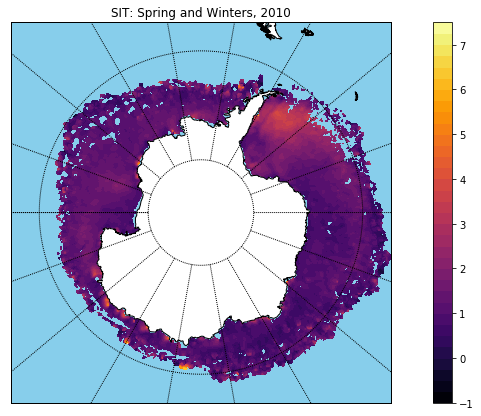

In [12]:
plt_map(data)
plt.title('SIT: Spring and Winters, 2010')

/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Text(0.5, 1.0, 'SIT: October, 2002-2010')

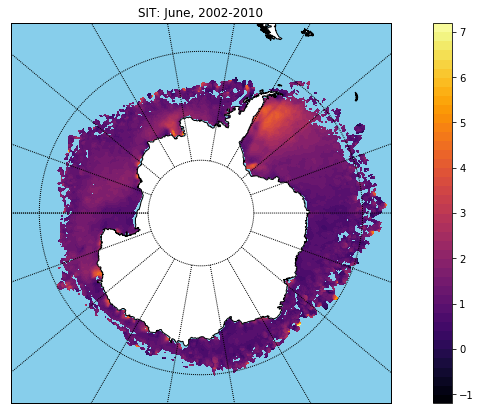

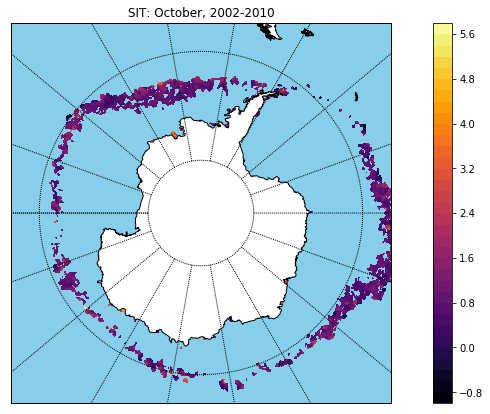

In [13]:
mask_June = periods.month==6
data_June = SIT[mask_June].mean(axis=0)
plt_map(data_June)
plt.title('SIT: June, 2002-2010')

mask_Oct = periods.month==10
data_Oct = SIT[mask_Oct].mean(axis=0)
plt_map(data_Oct)
plt.title('SIT: October, 2002-2010')

In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [15]:
access_pr_file = 'air.mon.mean_1979-2015.nc'
dset = xr.open_dataset(access_pr_file)
clim = dset['air'].mean('time', keep_attrs=True)
anom = clim-np.mean(clim)
anom.attrs['units'] = 'degree Celsius'
anom[1]

<xarray.DataArray 'air' (lat: 73, lon: 144)>
array([[23.337288 , 23.337288 , 23.337288 , ..., 23.337288 , 23.337288 ,
        23.337288 ],
       [23.53052  , 23.556587 , 23.581192 , ..., 23.440811 , 23.47246  ,
        23.50235  ],
       [23.641788 , 23.747412 , 23.842974 , ..., 23.273642 , 23.404043 ,
        23.52686  ],
       ...,
       [ 5.577654 ,  5.3852863,  5.2148743, ...,  6.2747097,  6.023649 ,
         5.790781 ],
       [ 4.427908 ,  4.336567 ,  4.250223 , ...,  4.7386   ,  4.6295757,
         4.52598  ],
       [ 5.6067257,  5.6067257,  5.6067257, ...,  5.6067257,  5.6067257,
         5.6067257]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
    level    float32 925.0
Attributes:
    units:    degree Celsius

In [31]:
n=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


In [32]:
lat  = dset.variables['lat'][:]
lon  = dset.variables['lon'][:]
x, y = n(*np.meshgrid(lon,lat))

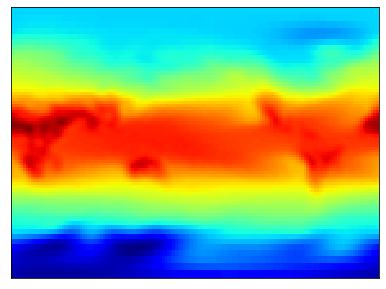

In [33]:
fig = plt.figure(figsize=[12,5])
n.pcolormesh(x,y,anom[1],shading='flat',cmap=plt.cm.jet)
ax.coastlines()
plt.show()

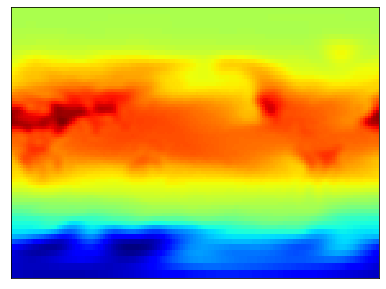

In [34]:
clim = dset['air'].groupby('time.season').mean('time', keep_attrs=True) 
JJA=clim.sel(season='JJA')
fig = plt.figure(figsize=[12,5])
n.pcolormesh(x,y,JJA[1],shading='flat',cmap=plt.cm.jet)
ax.coastlines()
plt.show()

In [16]:
SIT_file='SIT.nc'
ds = xr.open_dataset(SIT_file, decode_coords=False)

/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/home/eebc177student/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


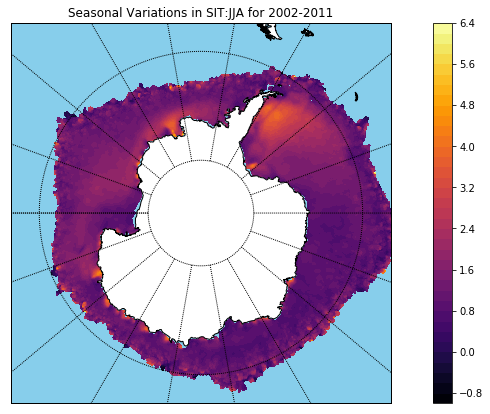

In [17]:

    m = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l')
    x, y = m(lon, lat)
    fig = plt.figure(figsize=(15,7))
    m.fillcontinents(color='white',lake_color='gray')
    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='skyblue')
    clim_SIT = ds['SIT'].groupby('time.season').mean('time', keep_attrs=True) 
    JJA=clim_SIT.sel(season='JJA')
    m.contourf(x,y,JJA,40,cmap=plt.cm.get_cmap('inferno'))
    plt.title("Seasonal Variations in SIT:{} for {}".format("JJA","2002-2011"))
    plt.colorbar()
    plt.show()

In [22]:
def season_plot(data,Season):
    m = Basemap(projection='spstere',boundinglat=-50,lon_0=90,resolution='l')
    x, y = m(lon, lat)
    fig = plt.figure(figsize=(15,7))
    m.fillcontinents(color='white',lake_color='gray')
    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='skyblue')
    clim_SIT = data.groupby('time.season').mean('time', keep_attrs=True) 
    ssn=clim_SIT.sel(season=Season)
    levels = [-0.5,0.5,1,1.5,2,2.5,3,3.5,4]
    m.contourf(x,y,ssn,levels,cmap=plt.cm.get_cmap('inferno'))
    plt.title('Seasonal variations in SIT for {}:(2002-2011)'.format(Season))
    plt.colorbar()
    plt.show()

/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


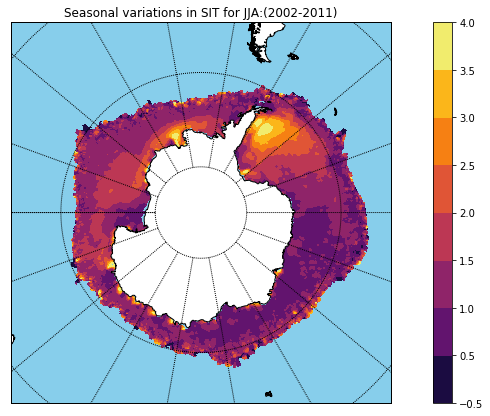

<Figure size 432x288 with 0 Axes>

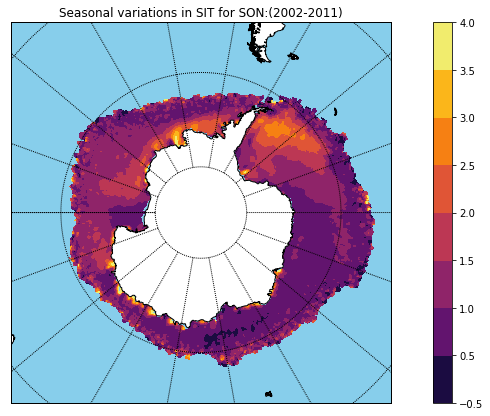

<Figure size 432x288 with 0 Axes>

In [23]:
season_plot(ds['SIT'],'JJA')
season_plot(ds['SIT'],'SON')